# Data Visualization

Setup, load data, make timeseries index, slice to the years 1998 to 2017

In [1]:
import pandas
df = pandas.read_csv('Messstationen_Tagesdaten_v2_Datensatz_19900101_20250515.csv')
df['time'] = pandas.to_datetime(df['time'], utc=True)
df = df.set_index('time', drop=True)
df = df['1998-01-01 00:00:00': '2017-12-31 00:00:00']


In [2]:
df

,station,cglo_j,rr,tl_mittel,vv_mittel,p_mittel,tlmin,tlmax
time,,,,,,,,
1998-01-01 00:00:00+00:00,13305,NaN,-1.0,-1.2,0.6,959.3,-5.1,2.8
1998-01-02 00:00:00+00:00,13305,NaN,-1.0,-0.8,0.6,948.8,-3.3,1.7
1998-01-03 00:00:00+00:00,13305,NaN,-1.0,2.1,1.0,951.9,-2.1,6.2
1998-01-04 00:00:00+00:00,13305,NaN,-1.0,6.0,2.6,953.1,0.3,11.7
1998-01-05 00:00:00+00:00,13305,NaN,-1.0,2.2,1.0,953.8,-3.0,7.3
...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,13305,225.0,18.6,1.5,1.0,937.0,-4.8,7.8
2017-12-28 00:00:00+00:00,13305,223.0,0.0,4.1,1.5,935.3,1.1,7.0
2017-12-29 00:00:00+00:00,13305,540.0,-1.0,0.1,2.1,951.2,-3.6,3.7


We can diretcly plot columns of a dataframe

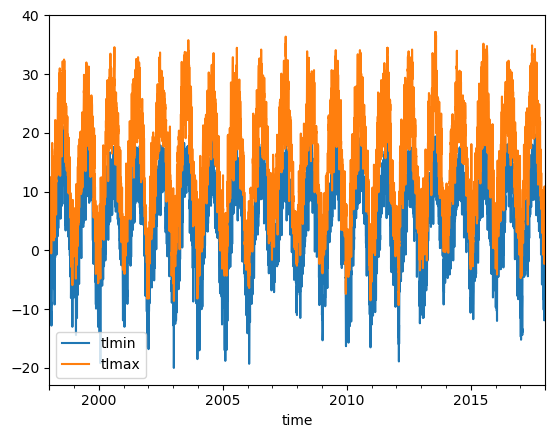

In [3]:
import matplotlib.pyplot as plt

df[['tlmin', 'tlmax']].plot()
plt.show()

Lets just plot a single year.

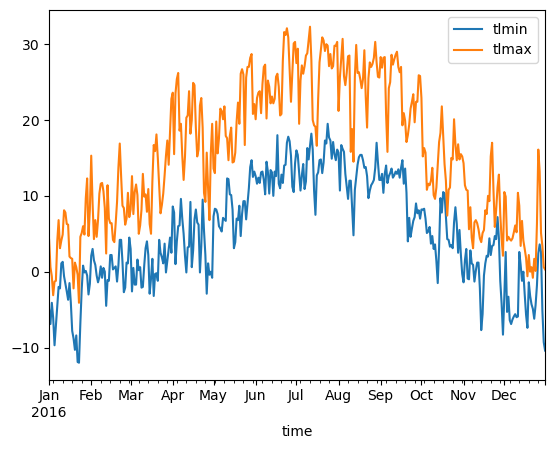

In [4]:

df['2016-01-01 00:00': '2016-12-31 00:00'][['tlmin', 'tlmax']].plot()
plt.show()

**Exercise**: Plot the yearly average temperatures.

## Pariplot

To get a better grasp for a new dataset, especially to investigate the interplay of features, you probably want to see a lot of plots.
seabor is a wrapper around matplotlib that provides additional helper methods.

In [5]:
import seaborn as sns

sns.pairplot(df)

ModuleNotFoundError: No module named 'seaborn'

## Histograms

In [ ]:
sns.displot(df['tl_mittel'], kde=True)
plt.show()

## Cross Correlation

In [ ]:
import numpy as np

correlations = df.corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlations, mask=mask, cmap=cmap)
plt.show()

## Boxplots

In [ ]:
df[['tl_mittel', 'tlmin', 'tlmax']].boxplot()
plt.show()